# Understanding Centering and Scaling in PCA

In [91]:
import numpy as np

# Method 1 : Manual, using numpy functions

Load data using np function. I have saved the data in form of a table in a comma separated file and saved the file as *.txt. This loading can be done using "pandas" library as well in form of a "dataframe" which may demonstrated in some lster tutorial. But note that numpy library is capaable of handling very large datasets in a very efficient manner as compared to pandas.

In [92]:
assignment1_data = np.genfromtxt('assignment1.txt', delimiter=',')

In [93]:
print(assignment1_data)

[[nan nan nan]
 [ 7.  4.  3.]
 [ 4.  1.  8.]
 [ 6.  3.  5.]
 [ 8.  6.  1.]
 [ 8.  5.  7.]
 [ 7.  2.  9.]
 [ 5.  3.  3.]
 [ 9.  5.  8.]
 [ 7.  4.  5.]
 [ 8.  2.  2.]]


In [94]:
noheader_data=np.delete(assignment1_data,0,0) # I deleted the header row.
A=noheader_data # I could have directly done this but for making some sense out of names, I chose to name my array as "noheader_data" earlier.

In [95]:
print(noheader_data)

[[7. 4. 3.]
 [4. 1. 8.]
 [6. 3. 5.]
 [8. 6. 1.]
 [8. 5. 7.]
 [7. 2. 9.]
 [5. 3. 3.]
 [9. 5. 8.]
 [7. 4. 5.]
 [8. 2. 2.]]


In [96]:
# calculate the mean of each column
M = np.mean(A.T, axis=1)
print(M)

[6.9 3.5 5.1]


In [97]:
# center columns by subtracting column means
C = A - M
print(C)

[[ 0.1  0.5 -2.1]
 [-2.9 -2.5  2.9]
 [-0.9 -0.5 -0.1]
 [ 1.1  2.5 -4.1]
 [ 1.1  1.5  1.9]
 [ 0.1 -1.5  3.9]
 [-1.9 -0.5 -2.1]
 [ 2.1  1.5  2.9]
 [ 0.1  0.5 -0.1]
 [ 1.1 -1.5 -3.1]]


In [98]:
# calculate covariance matrix of centered matrix
V = np.cov(C.T)
print(V)

[[ 2.32222222  1.61111111 -0.43333333]
 [ 1.61111111  2.5        -1.27777778]
 [-0.43333333 -1.27777778  7.87777778]]


In [99]:
# eigendecomposition of covariance matrix
values, vectors = np.linalg.eig(V)
print(vectors)
print(values)

[[-0.70172743  0.69903712 -0.1375708 ]
 [ 0.70745703  0.66088917 -0.25045969]
 [ 0.08416157  0.27307986  0.95830278]]
[0.74992815 3.67612927 8.27394258]


In [100]:
# project data
P = vectors.T.dot(C.T)
print(P.T)

[[ 0.10681648 -0.17311941 -2.15142276]
 [ 0.5104355  -2.88749898  3.80418259]
 [ 0.26941001 -0.98688598  0.15321328]
 [ 0.65167999  1.30153634 -4.7065185 ]
 [ 0.44919235  2.27912632  1.29375788]
 [-0.80312818  0.1435814   4.0993133 ]
 [ 0.80281431 -2.23208282 -1.62582148]
 [-0.16837351  3.2512433   2.11448986]
 [ 0.27513962  0.37304031 -0.2348172 ]
 [-2.09398657 -1.06894049 -2.74637697]]


# Method 1 : Without Centering

In [101]:
# center columns by subtracting column means
C = A
print(C)

[[7. 4. 3.]
 [4. 1. 8.]
 [6. 3. 5.]
 [8. 6. 1.]
 [8. 5. 7.]
 [7. 2. 9.]
 [5. 3. 3.]
 [9. 5. 8.]
 [7. 4. 5.]
 [8. 2. 2.]]


In [102]:
# calculate covariance matrix of centered matrix
V = np.cov(C.T)
print(V)

[[ 2.32222222  1.61111111 -0.43333333]
 [ 1.61111111  2.5        -1.27777778]
 [-0.43333333 -1.27777778  7.87777778]]


In [103]:
# eigendecomposition of covariance matrix
values, vectors = np.linalg.eig(V)
print(vectors)
print(values)

[[-0.70172743  0.69903712 -0.1375708 ]
 [ 0.70745703  0.66088917 -0.25045969]
 [ 0.08416157  0.27307986  0.95830278]]
[0.74992815 3.67612927 8.27394258]


In [104]:
# project data
P = vectors.T.dot(C.T)
print(P.T)

[[-1.82977916  8.3560561   0.91007402]
 [-1.42616015  5.64167652  6.86567938]
 [-1.66718563  7.54228952  3.21471006]
 [-1.28491566  9.83071184 -1.64502171]
 [-1.48740329 10.80830182  4.35525466]
 [-2.73972383  8.67275691  7.16081008]
 [-1.13378134  6.29709269  1.4356753 ]
 [-2.10496915 11.7804188   5.17598665]
 [-1.66145603  8.90221581  2.82667958]
 [-4.03058222  7.46023502  0.31511981]]


In [117]:
import plotly.express as px

In [119]:
fig = px.scatter(P, x=1, y=2)
fig.show()

# Method 2 : Using PCA function in sklearn library

In [105]:
from sklearn.decomposition import PCA

In [106]:
pca = PCA(3)

In [107]:
# fit on data
pca.fit(A)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [108]:
# access values and vectors
print(pca.components_)
print(pca.explained_variance_)

[[ 0.1375708   0.25045969 -0.95830278]
 [ 0.69903712  0.66088917  0.27307986]
 [ 0.70172743 -0.70745703 -0.08416157]]
[8.27394258 3.67612927 0.74992815]


In [109]:
# transform data
B = pca.transform(A)
print(B)

[[ 2.15142276 -0.17311941 -0.10681648]
 [-3.80418259 -2.88749898 -0.5104355 ]
 [-0.15321328 -0.98688598 -0.26941001]
 [ 4.7065185   1.30153634 -0.65167999]
 [-1.29375788  2.27912632 -0.44919235]
 [-4.0993133   0.1435814   0.80312818]
 [ 1.62582148 -2.23208282 -0.80281431]
 [-2.11448986  3.2512433   0.16837351]
 [ 0.2348172   0.37304031 -0.27513962]
 [ 2.74637697 -1.06894049  2.09398657]]


In [111]:
import plotly.express as px

In [116]:
fig = px.scatter(B, x=0, y=1)
fig.show()

# Method 3 : Loading data with pandas dataframe

In [134]:
import pandas as pd

In [135]:
df = pd.read_csv('assignment1.txt')

In [136]:
df.head()

,length,width,thickness
0,7,4,3
1,4,1,8
2,6,3,5
3,8,6,1
4,8,5,7


In [137]:
print(df)

   length   width   thickness
0       7       4           3
1       4       1           8
2       6       3           5
3       8       6           1
4       8       5           7
5       7       2           9
6       5       3           3
7       9       5           8
8       7       4           5
9       8       2           2


In [138]:
pca = PCA(3)

In [139]:
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [140]:
# access values and vectors
print(pca.components_)
print(pca.explained_variance_)

[[ 0.1375708   0.25045969 -0.95830278]
 [ 0.69903712  0.66088917  0.27307986]
 [ 0.70172743 -0.70745703 -0.08416157]]
[8.27394258 3.67612927 0.74992815]


In [141]:
# transform data
newdf = pca.transform(df)
print(newdf)

[[ 2.15142276 -0.17311941 -0.10681648]
 [-3.80418259 -2.88749898 -0.5104355 ]
 [-0.15321328 -0.98688598 -0.26941001]
 [ 4.7065185   1.30153634 -0.65167999]
 [-1.29375788  2.27912632 -0.44919235]
 [-4.0993133   0.1435814   0.80312818]
 [ 1.62582148 -2.23208282 -0.80281431]
 [-2.11448986  3.2512433   0.16837351]
 [ 0.2348172   0.37304031 -0.27513962]
 [ 2.74637697 -1.06894049  2.09398657]]


In [142]:
fig = px.scatter(newdf, x=0, y=1)
fig.show()

In [145]:
# Calculating the explained variance on each of components
variance_explained = []
for i in pca.explained_variance_:
     variance_explained.append((i/sum(pca.explained_variance_))*100)
print(variance_explained)

[65.14915417643985, 28.9458997385617, 5.904946084998456]


In [146]:
# Identifying components that explain at least 95%
cumulative_variance_explained = np.cumsum(variance_explained)
print(cumulative_variance_explained)

[ 65.14915418  94.09505392 100.        ]


Text(0.5,1,'Explained variance vs Number of components')

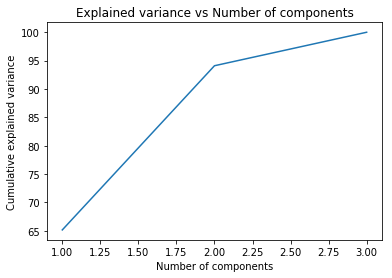

In [150]:
# Visualizing the eigenvalues and finding the "elbow" in the graphic
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x = [1,2,3], y=cumulative_variance_explained)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained variance vs Number of components")